In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
##
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

In [2]:
def Pi_MC(N):
    ncirc=0
    for i in range(N):
        x,y=np.random.rand(2)
        if x**2+y**2<=1:
            ncirc+=1
    return 4*ncirc/N

In [23]:
Data_PIMC=[]
for j in range(10000):
    Data_PIMC.append(Pi_MC(10000))

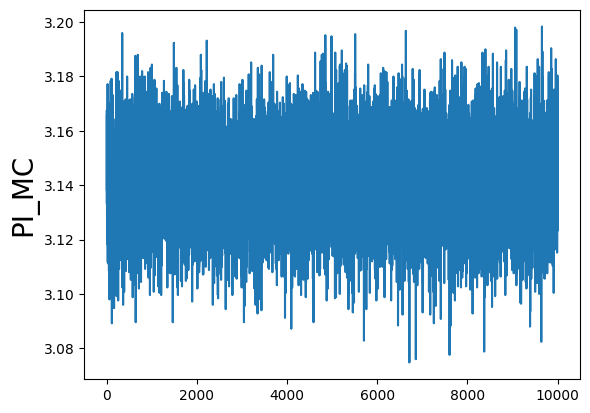

In [24]:
plt.plot(Data_PIMC)
plt.ylabel(r'PI_MC',size=20)
plt.show()

In [25]:
np.mean(Data_PIMC)

3.141354

In [27]:
np.std(Data_PIMC)

0.016265713510325942

In [30]:
counts,base=np.histogram(Data_PIMC,bins=100)

In [31]:
len(counts)

100

In [32]:
len(base)

101

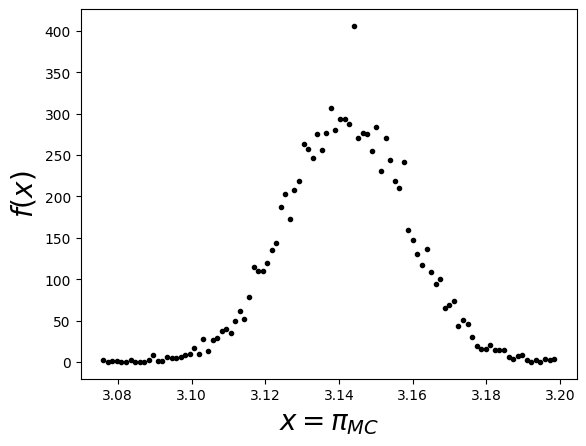

In [34]:
plt.plot(base[1:],counts,'k.')
plt.ylabel(r'$f(x)$',size=20)
plt.xlabel(r'$x=\pi_{MC}$',size=20)
plt.show()

In [37]:
X=np.random.rand(100)
Y=np.random.rand(100)

In [42]:
sum(X**2+Y**2<=1)

79

In [43]:
def Pi_MC2(N):
    X=np.random.rand(N)
    Y=np.random.rand(N)
    return 4*sum(X**2+Y**2<=1)/N

In [56]:
Data_PIMC=[]
for j in range(100000):
    Data_PIMC.append(Pi_MC2(10000))

In [61]:
np.sqrt(100000)

316.22776601683796

In [67]:
counts,base=np.histogram(Data_PIMC,bins=100)

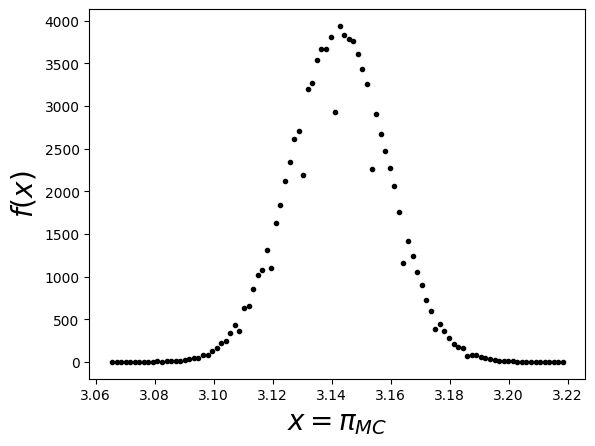

In [68]:
plt.plot(base[1:],counts,'k.')
plt.ylabel(r'$f(x)$',size=20)
plt.xlabel(r'$x=\pi_{MC}$',size=20)
plt.show()

In [66]:
np.mean(Data_PIMC)

3.141588684

In [3]:
import pandas as pd

In [4]:
df_dis=pd.read_csv("/home/alejandro/Desktop/Clase Markov/Datos Mayo 19 2023/dis_us_d.csv")

In [5]:
df_dis.head()

,Date,Open,High,Low,Close,Volume
0,1970-01-02,0.50210,0.50210,0.50210,0.50210,1242852.0
1,1970-01-05,0.51070,0.51950,0.50210,0.50210,1613525.0
2,1970-01-06,0.49311,0.49311,0.48430,0.49311,3924788.0
3,1970-01-07,0.49311,0.50210,0.49311,0.50210,6432293.0
4,1970-01-08,0.50210,0.51950,0.50210,0.51070,2594722.0


In [116]:
df_dis.tail()

,Date,Open,High,Low,Close,Volume
13454,2023-05-12,92.340,92.880,91.24,91.99,21837450.0
13455,2023-05-15,91.540,92.870,90.70,92.86,16792049.0
13456,2023-05-16,92.040,92.415,90.78,90.98,17013309.0
13457,2023-05-17,91.020,93.050,90.85,92.77,12461594.0
13458,2023-05-18,92.845,94.240,92.46,93.76,14990859.0


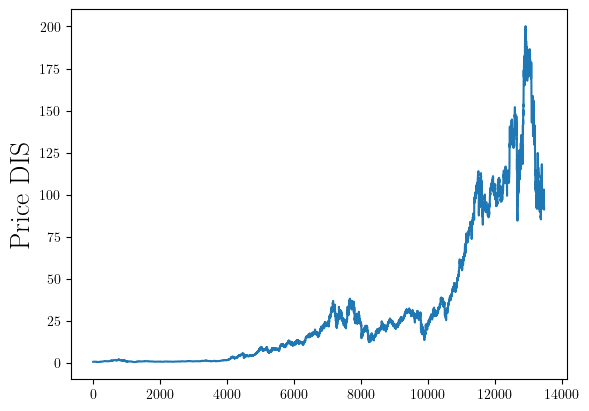

In [6]:
plt.plot(df_dis['Open'])
plt.ylabel(r'Price DIS',size=20)
plt.show()

In [7]:
price_dis=np.array(df_dis['Open'])

In [8]:
Delta_dis=(price_dis[1:]-price_dis[:-1])/price_dis[:-1]

In [9]:
price_dis

array([ 0.5021 ,  0.5107 ,  0.49311, ..., 92.04   , 91.02   , 92.845  ])

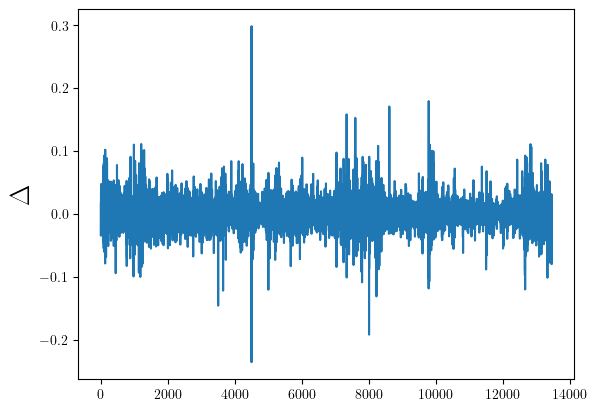

In [10]:
plt.plot(Delta_dis)
plt.ylabel(r'$\Delta$',size=20)
plt.show()

In [11]:
counts,base=np.histogram(Delta_dis,bins=100)

In [12]:
np.sqrt(len(Delta_dis))

116.00862036935014

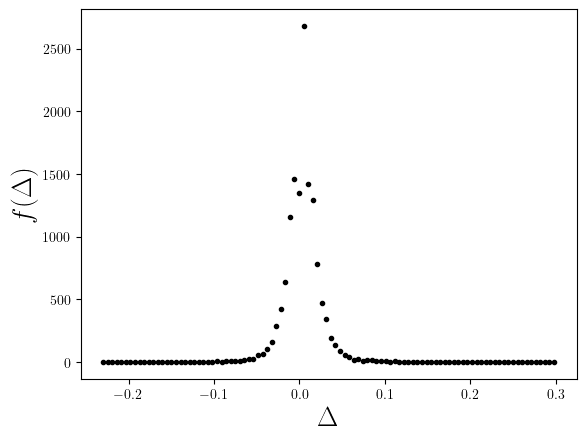

In [13]:
plt.plot(base[1:],counts,'k.')
plt.ylabel(r'$f(\Delta)$',size=20)
plt.xlabel(r'$\Delta$',size=20)
plt.show()

In [14]:
P_dis=Delta_dis[Delta_dis>0]

In [15]:
counts,base=np.histogram(P_dis,bins=100)

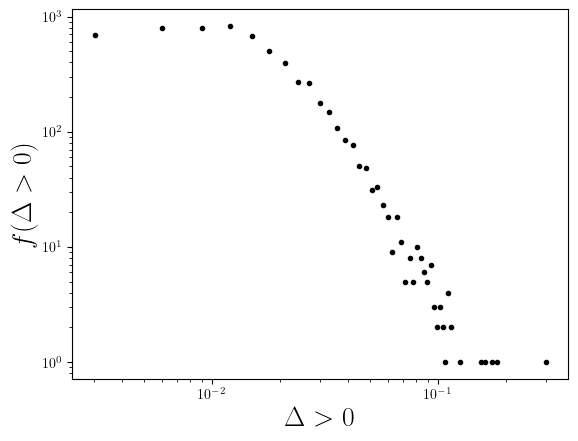

In [16]:
plt.loglog(base[1:],counts,'k.')
plt.ylabel(r'$f(\Delta>0)$',size=20)
plt.xlabel(r'$\Delta>0$',size=20)
plt.show()

In [17]:
P_dis=Delta_dis[Delta_dis>0]
binlist=10**np.linspace(-3,-0.5,100)
counts,base=np.histogram(P_dis,bins=binlist,density=True)

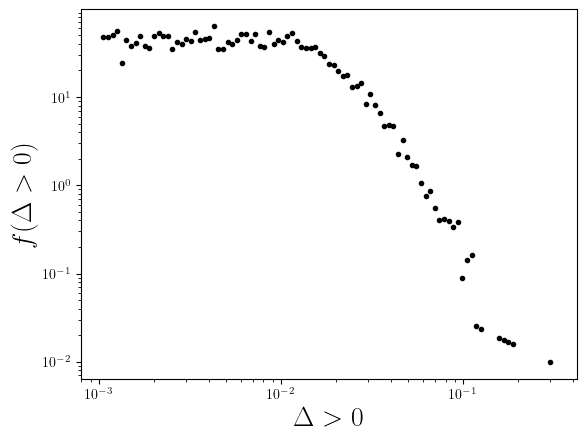

In [18]:
plt.loglog(base[1:],counts,'k.')
plt.ylabel(r'$f(\Delta>0)$',size=20)
plt.xlabel(r'$\Delta>0$',size=20)
plt.show()

In [19]:
N_dis=Delta_dis[Delta_dis<0]
binlist=10**np.linspace(-3,-0.5,100)
counts,base=np.histogram(abs(N_dis),bins=binlist,density=True)

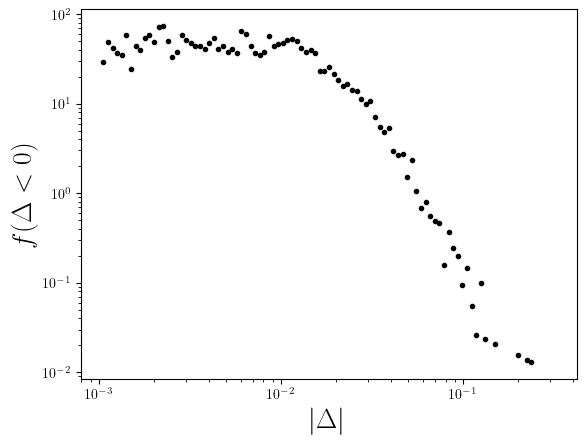

In [20]:
plt.loglog(base[1:],counts,'k.')
plt.ylabel(r'$f(\Delta<0)$',size=20)
plt.xlabel(r'$|\Delta|$',size=20)
plt.show()

In [21]:
df_nvda=pd.read_csv("/home/alejandro/Desktop/Clase Markov/Datos Mayo 19 2023/nvda_us_d.csv")

In [22]:
df_nvda.head()

,Date,Open,High,Low,Close,Volume
0,1999-01-22,0.401563,0.447428,0.355588,0.376292,7.398787e+07
1,1999-01-25,0.406159,0.419939,0.376292,0.415293,1.393125e+07
2,1999-01-26,0.419939,0.429071,0.378660,0.383147,9.385109e+06
3,1999-01-27,0.385404,0.394619,0.362562,0.383147,6.723086e+06
4,1999-01-28,0.383147,0.385404,0.378660,0.380859,6.227554e+06


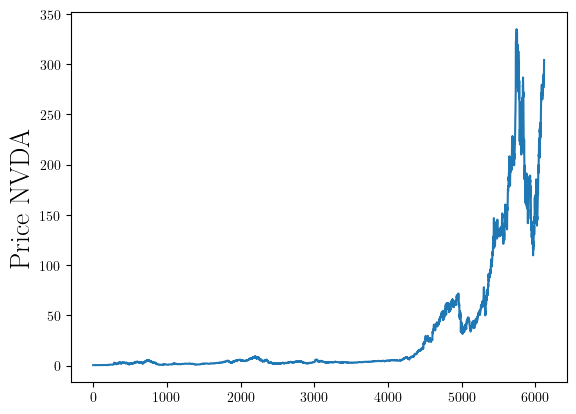

In [24]:
plt.plot(df_nvda['Open'])
plt.ylabel(r'Price NVDA',size=20)
plt.show()

In [25]:
price_nvda=np.array(df_nvda['Open'])

In [26]:
Delta=abs(price_nvda[1:]-price_nvda[:-1])/price_nvda[:-1]

In [27]:
binlist=10**np.linspace(-3,-0.3,100)
counts,base=np.histogram(Delta,bins=binlist,density=True)

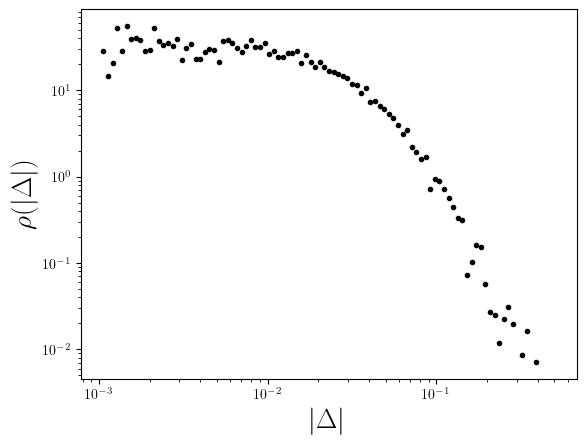

In [29]:
plt.loglog(base[1:],counts,'k.')
plt.ylabel(r'$\rho(|\Delta|)$',size=20)
plt.xlabel(r'$|\Delta|$',size=20)
plt.show()